In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import warnings
warnings.filterwarnings('ignore')

In [35]:
df_train=pd.read_csv('train.csv')
df_train.head(5)

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [36]:
df_test=pd.read_csv('test.csv')
df_test.head(5)

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez


In [56]:
df_train.shape

(8693, 14)

In [64]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   PassengerId   8693 non-null   object  
 1   HomePlanet    8693 non-null   category
 2   CryoSleep     8693 non-null   category
 3   Cabin         8693 non-null   object  
 4   Destination   8693 non-null   category
 5   Age           8693 non-null   object  
 6   VIP           8693 non-null   category
 7   RoomService   8693 non-null   object  
 8   FoodCourt     8693 non-null   object  
 9   ShoppingMall  8693 non-null   object  
 10  Spa           8693 non-null   object  
 11  VRDeck        8693 non-null   object  
 12  Name          8693 non-null   object  
 13  Transported   8693 non-null   category
dtypes: category(5), object(9)
memory usage: 654.4+ KB


# Data type chaage 

In [61]:
df_train.HomePlanet=df_train.HomePlanet.astype('category')
df_train.Destination=df_train.Destination.astype('category')
df_train.CryoSleep=df_train.CryoSleep.astype('category')
df_train.VIP=df_train.VIP.astype('category')
df_train.Transported=df_train.Transported.astype('category')

df_test.HomePlanet=df_test.HomePlanet.astype('category')
df_test.Destination=df_test.Destination.astype('category')
df_test.CryoSleep=df_test.CryoSleep.astype('category')
df_test.VIP=df_test.VIP.astype('category')



In [39]:
df_train.isnull().sum()

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

### Removing duplicate values

In [40]:
data=df_train.drop_duplicates()
print(df_train.shape)
print(data.shape)

(8693, 14)
(8693, 14)


In [41]:
print('HomePlanet:',df_train.HomePlanet.unique())
print('Destination:',df_train.Destination.unique())
print('VIP:',df_train.VIP.unique())

HomePlanet: ['Europa' 'Earth' 'Mars' nan]
Destination: ['TRAPPIST-1e' 'PSO J318.5-22' '55 Cancri e' nan]
VIP: [False True nan]


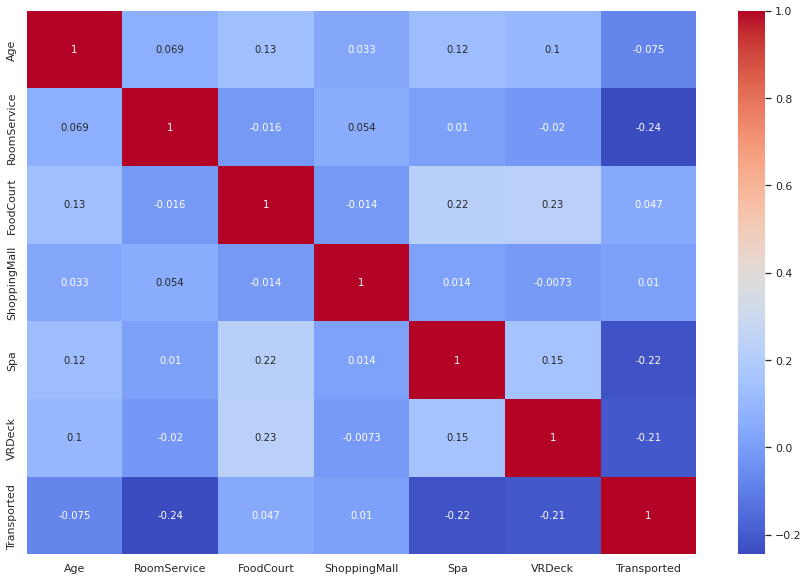

In [42]:
# Checking the correlation
corr=df_train.corr()
plt.figure(figsize=(15,10))
sns.heatmap(corr,cmap="coolwarm",annot=True)
plt.show()

## Fill the missing value

In [46]:
from sklearn.impute import SimpleImputer
imputer=SimpleImputer(missing_values=np.nan,strategy='most_frequent')
df_train=pd.DataFrame(imputer.fit_transform(df_train)
                      ,columns=df_train.columns
                      ,index=df_train.index)
df_test=pd.DataFrame(imputer.fit_transform(df_test)
                      ,columns=df_test.columns
                      ,index=df_test.index)

In [50]:
df_train=df_train.reset_index(drop=True)
df_test=df_test.reset_index(drop=True)


# Data Vis

In [80]:
HomePlanet=df_train.HomePlanet.value_counts()
HomePlanet

Earth     4803
Europa    2131
Mars      1759
Name: HomePlanet, dtype: int64

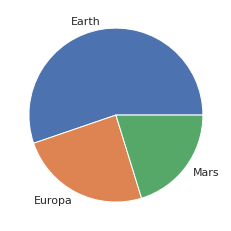

In [84]:
plt.pie(HomePlanet,labels=HomePlanet.index)
plt.show()

In [89]:
print(df_train.Transported.value_counts())
print(df_train.Transported.value_counts()[True]/
     df_train.Transported.value_counts()[False])

True     4378
False    4315
Name: Transported, dtype: int64
1.0146002317497103


In [95]:
Transported=df_train.Transported.value_counts()
Transported

True     4378
False    4315
Name: Transported, dtype: int64

In [97]:
sns.barplot(df_train.Transported)

TypeError: Horizontal orientation requires numeric `x` variable.